# Finding heavy traffic indicators on the I-94

For this project, we will analyse a dataset about westbound traffic on the I-94 interstate highway, which connects the Great Lakes and northern Great Plains regions of the United States. The dataset can be downloaded from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

We will be aiming to determine a few indicators of heavy traffic on the I-94 approximately midway between Minneapolis and Saint Paul. We will start by reading in the dataset and finding out some of its characteristics.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

AttributeError: module 'seaborn' has no attribute 'set_theme'

In [3]:
traffic_data = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
traffic_data.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic_data.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see that the dataset has 48204 rows and 9 columns, with no null objects. There are also strings, floats and integers in the dataset. 

Now we'll plot a histogram to understand the distribution of data in the traffic_volume column, and take a look at some descriptive statistics about the column.

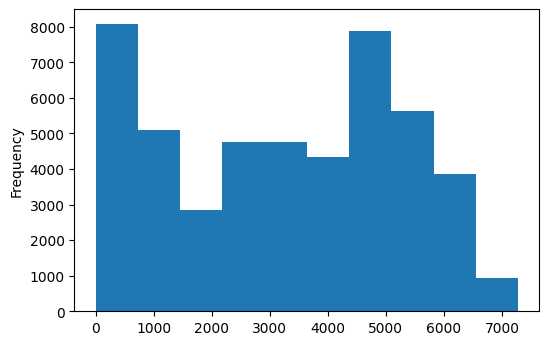

In [6]:
traffic_data['traffic_volume'].plot.hist()
plt.show()

In [7]:
traffic_data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the histogram and descriptive statistics, we can see that tje average number of vehicles recorded per hour is 3260, and that the values in the traffic_volume column range from 0 to 7280. There are 2 peaks in the traffic_volume column - between 0-750 and 4250-5000 vehicles per hour. 

We can also see that about 25% of the time, there were 1,193 cars or fewer passing the station each hour, and about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

The periods with lighter traffic could occur during the night, or when a road is under construction.

## Traffic volumes: Day time vs Night Time

To examine if there are differences between night time and day time traffic volume, we will divide the dataset into two parts:

- Day time data: hours from 7 a.m. to 7 p.m. (12 hours)
- Night time data: hours from 7 p.m. to 7 a.m. (12 hours)

In [8]:
# Isolating day time and night time data
traffic_data['date_time'] = pd.to_datetime(traffic_data['date_time'])
daytime_data = traffic_data[(traffic_data['date_time'].dt.hour >= 7) & (traffic_data['date_time'].dt.hour <= 18)]
nighttime_data = traffic_data[(traffic_data['date_time'].dt.hour < 7) | (traffic_data['date_time'].dt.hour >= 19)]
print(daytime_data.shape)
print(nighttime_data.shape)


(23877, 9)
(24327, 9)


There is quite a large difference between the number of rows for day and night time hours, which shouldn't be the case. This could be due to data missing for certain dates or hours. Let's check the data by hour.

In [9]:
traffic_data['date_time'].dt.hour.value_counts()

4     2091
6     2087
8     2080
7     2079
10    2078
5     2063
1     2049
23    2040
0     2037
3     2025
2     2019
9     2018
22    1994
16    1988
18    1986
21    1982
20    1979
14    1969
19    1961
12    1955
11    1952
15    1934
17    1933
13    1905
Name: date_time, dtype: int64

Looking at the value counts of hours in the date_time column, it is likely that the difference in the number of row row numbers between day and night is due to missing data for certain hours, particularly between the hours of 13:00 to 18:00

## Comparing day and night traffic volumes

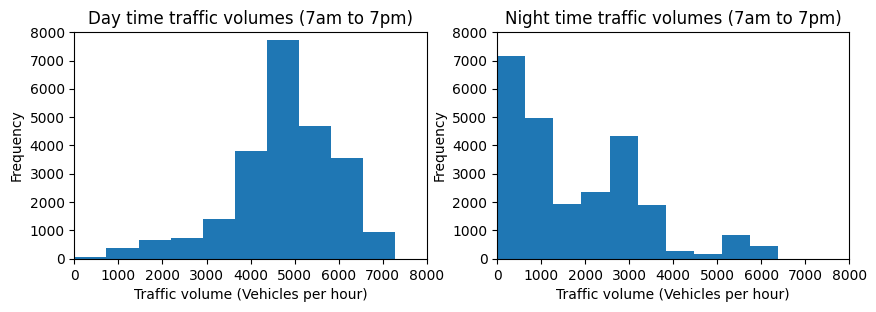

In [10]:
plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.hist(daytime_data['traffic_volume'])
plt.title('Day time traffic volumes (7am to 7pm)')
plt.xlabel('Traffic volume (Vehicles per hour)')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.subplot(1, 2, 2)
plt.hist(nighttime_data['traffic_volume'])
plt.title('Night time traffic volumes (7am to 7pm)')
plt.xlabel('Traffic volume (Vehicles per hour)')
plt.ylabel('Frequency')
plt.xlim([0, 8000])
plt.ylim([0, 8000])

plt.show()

In [11]:
daytime_data['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
nighttime_data['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Comparing the histograms, traffic volumes in the day time are skewed left, indicating that there are generally high traffic volumes during day time hours.

Night time traffic volumes are skewed right, indicating that night time traffic volumes are lower. 

Higher day time traffic volumes can also be seen in the descriptive statistics. Day time traffic volumes are 4762 on average, compared to 1785 for night time. Although night time traffic volumes can be very high (up to 6386 vehicles per hour), they only exceed 2819 25% of the time. This is much lower than day time values, which exceed 4252 75% of the time.

As our goal is to find indicators of heavy traffic, we will be focusing on the day time data from this point onwards.

# Comparing traffic volumes across time

As one of the possible indicators of heavy traffic is time we're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

<ipython-input-13-0ab4acf661bb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



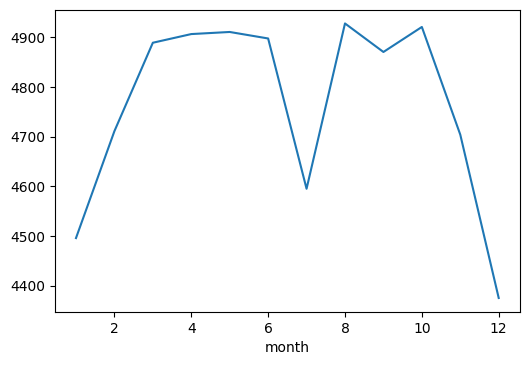

In [13]:
# Getting average traffic volumes in each month
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

Looking at the line graph of average traffic volumes in each month, we can see that traffic is less heavy during cold months (November–February) and more intense during warm months (March–October), with the exception of July. 

To understand if traffic is lower in July every year, we'll look at how the traffic volume changed each year in July.

<ipython-input-14-7aa4e53ec4d8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



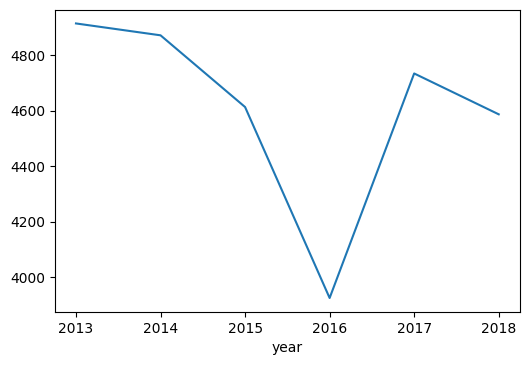

In [14]:
daytime_data['year'] = daytime_data['date_time'].dt.year
only_july = daytime_data[daytime_data['month'] == 7]
only_july_mean = only_july.groupby('year').mean()
only_july_mean['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) from 2016 supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

## Traffic volumes on different days of the week

<ipython-input-15-f0dfcc5259aa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



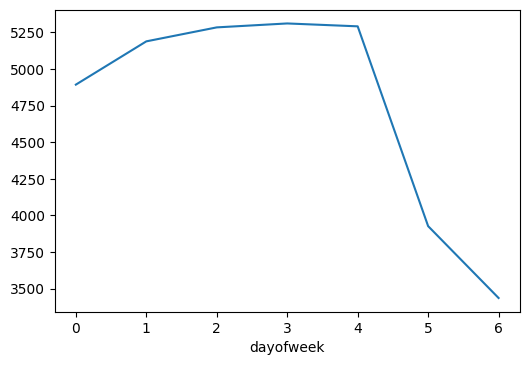

In [15]:
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()
# 0 is Monday, 6 is Sunday

Traffic is generally much heavier on business days than on weekends, probably because more people are travelling to and from work.

Let's now see what values we have based on time of the day. The weekends, will drag down the average values, so we're going to look only at the averages separately.

<ipython-input-16-5e393c26e914>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



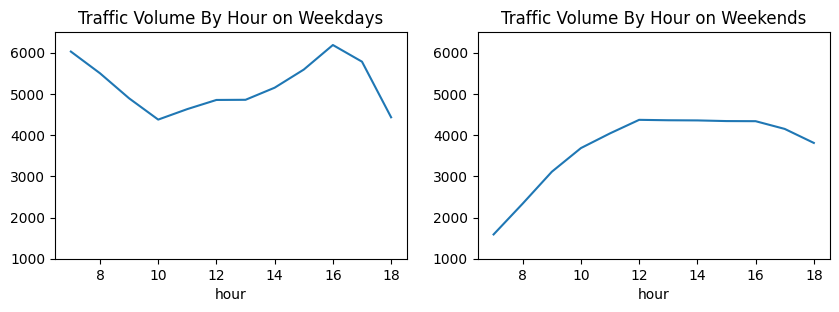

In [16]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
business_days = daytime_data[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.ylim(1000,6500)
plt.title('Traffic Volume By Hour on Weekdays')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.ylim(1000,6500)
plt.title('Traffic Volume By Hour on Weekends')

plt.show()

Traffic on weekdays is generally higher at every hour than trffic on weekends. The traffic patterns on weekdays are also quite different from those on weekends. Traffic on business days peaks from around 7am and 4pm, when people are travelling to and from work. On weekends it increases steadily until noon, then plateaus and decreases after 4pm.

To summarize, we found that traffic tends to be heavier at certain times:

- Traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- Traffic is usually heavier on business days compared to weekends.
- On business days, the peak hours are around 7am and 4pm.

## Weather-related indicators of heavy traffic during the day time

Apart from time, another possible indicator of heavy traffic is the weather. The dataset has a few numerical columns about the weather (temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description) so we'll look at their correlation with traffic volumes.

In [25]:
weather = ['temp','rain_1h', 'snow_1h', 'clouds_all']
for w in weather:
    corr_coeff = daytime_data['traffic_volume'].corr(daytime_data[w])
    print(w + ' correlation coefficient:')
    print(corr_coeff)
    

temp correlation coefficient:
0.12831656852303905
rain_1h correlation coefficient:
0.0036965098350734324
snow_1h correlation coefficient:
0.001265349847175986
clouds_all correlation coefficient:
-0.03293234866163948


We can see that temperature has the strongest correlation with traffic volumes, so we'll plot a scattor plot of the 2 columns to see what the data looks like.

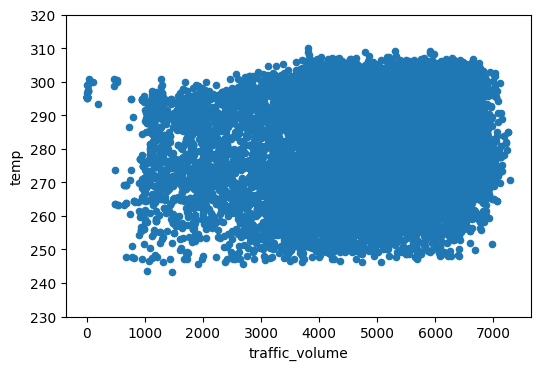

In [28]:
daytime_data.plot.scatter(x='traffic_volume', y='temp')
plt.ylim(230,320)
plt.show()

Based on the scatter plot, we can conclude that temperature is not a reliable indicator for heavy traffic.

### Categorical weather-related data

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

In [33]:
# Getting the mean values of other columns based on the categories in the weather_main and weather_description columns
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_description = daytime_data.groupby('weather_description').mean()

We'll start with average traffic volumes by main weather types.

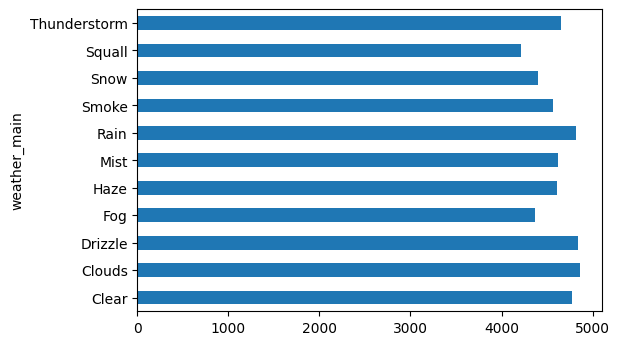

In [32]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

None of the main weather types correspond to traffic volumes of >5000 on average. Most range from 4000 to about 4900, which are not so different from the day time average traffic volume of of 4762. This suggests that none of the main weather types are heavy traffic indicators.

Now let's look at how traffic volumes vary according to weather descriptions.

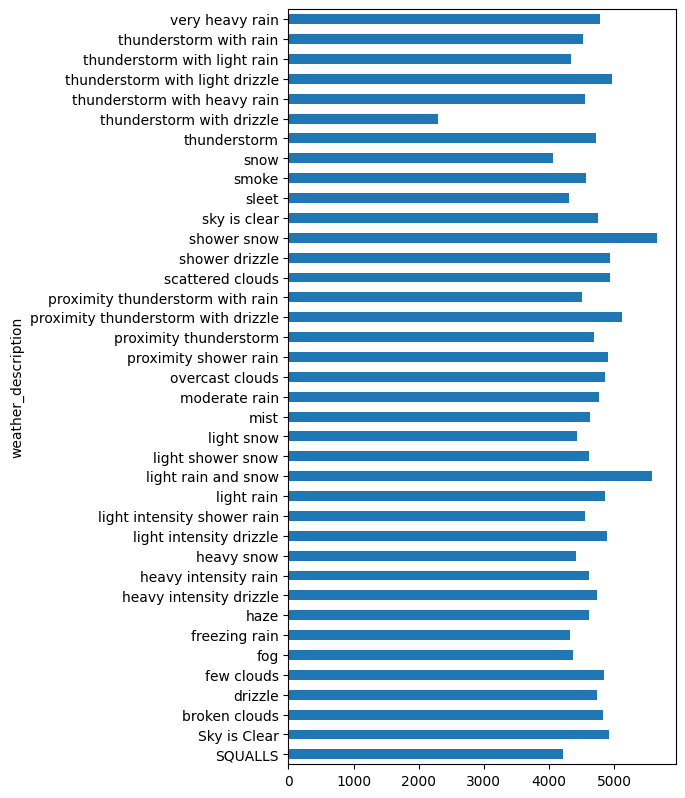

In [36]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

On average, traffic volumes exceed 5000 for three weather descriptions:
- shower snow
- light rain and snow
- proximity thunderstorm with drizzle

It is not clear why these weather types have the highest average traffic volumes, as they are inclement but not particularly bad. Perhaps more people use their cars when the weather is bad instead of riding a bike, walking or taking public transport.

Now let's repeat the analysis of weather indicators using night time traffic to see whether the indicators differ.

## Weather-related indicators of heavy traffic during the night time

In [37]:
weather = ['temp','rain_1h', 'snow_1h', 'clouds_all']
for w in weather:
    corr_coeff = nighttime_data['traffic_volume'].corr(nighttime_data[w])
    print(w + ' correlation coefficient:')
    print(corr_coeff)

temp correlation coefficient:
0.09400411494394051
rain_1h correlation coefficient:
-0.01297207339663064
snow_1h correlation coefficient:
-0.007452767057153404
clouds_all correlation coefficient:
0.012832397130857667


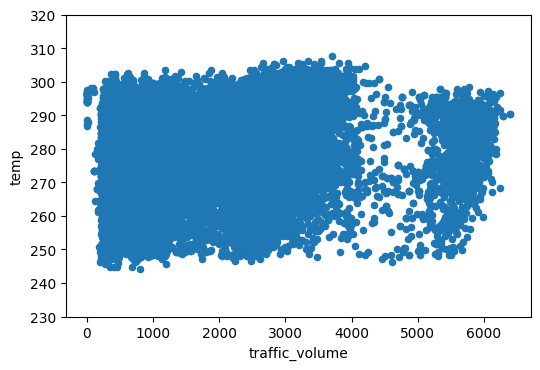

In [38]:
nighttime_data.plot.scatter(x='traffic_volume', y='temp')
plt.ylim(230,320)
plt.show()

We can see that all the numerical weather columns have weak correlations with traffic volumes, and that temperature is not a strong indicator of traffic volumes.

### Categorical weather data and night time traffic

In [42]:
# Getting the mean values of other columns based on the categories in the weather_main and weather_description columns
by_weather_main_night = nighttime_data.groupby('weather_main').mean()
by_weather_description_night = nighttime_data.groupby('weather_description').mean()

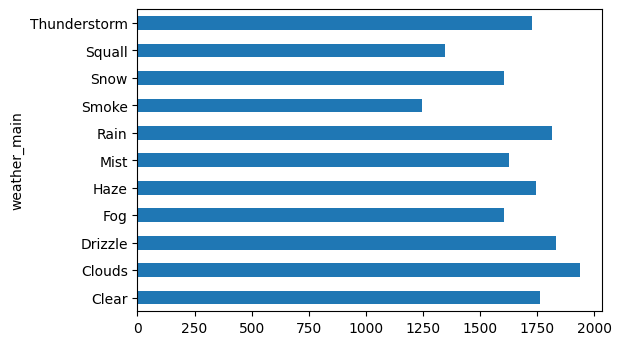

In [44]:
by_weather_main_night['traffic_volume'].plot.barh()
plt.show()

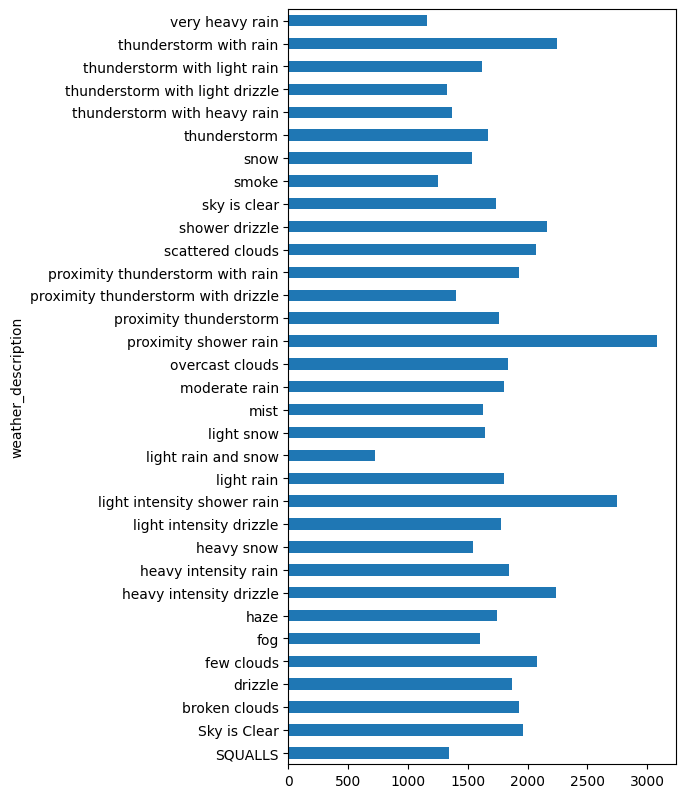

In [43]:
by_weather_description_night['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

None of the main weather types have average night time traffic volumes much higher then the night time average of 1785, but the a number of weather descriptions do, with the following weather types corresponding to the highest average traffic volumes:
- thunderstorm with rain 
- proximity shower rain
- light intensity shower rain
- heavy intensity drizzle

These weather types are different from those that correspond to heavy traffic during the day time. It is not clear why showers or drizzles would be indicators of heavy traffic, but it is possible that when certain types of rain occur, people drive at slower speeds and more people use their cars instead of walking, cycling or taking public transport. 

Now we will investigate whether these weather types occur more frequently during certain months of the year.

## Time-related indicators of heavy night time traffic

For this, we will only look at monthly traffic volumes as we want to investigate whether months with heavier traffic are when the types of weather indicative of heavier traffic tend to occur more frequently.

<ipython-input-45-5225b11eaea5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



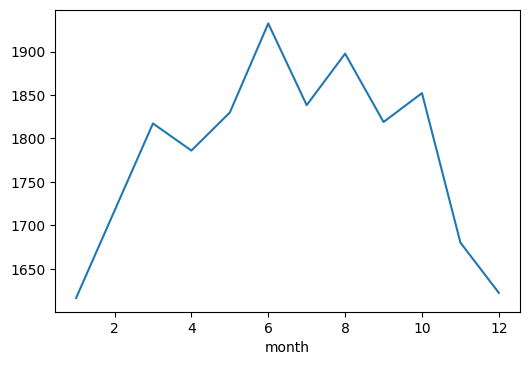

In [45]:
# Getting average traffic volumes in each month
nighttime_data['month'] = nighttime_data['date_time'].dt.month
by_month = nighttime_data.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

We can see that night time traffic volumes also tend to be higher during warmer months (March - October, and lower during colder months (November - February). Now let's see if the 4 weather types indicative of heavier night time traffic occur more frequently during warmer months.

- thunderstorm with rain 
- proximity shower rain
- light intensity shower rain
- heavy intensity drizzle

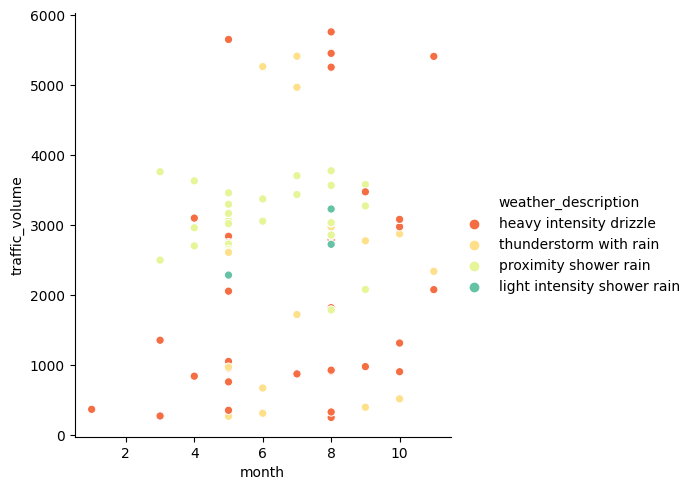

In [50]:
nighttime_weather = nighttime_data[nighttime_data['weather_description'].isin(['thunderstorm with rain', 'proximity shower rain', 'light intensity shower rain', 'heavy intensity drizzle'])]
sns.relplot(data=nighttime_weather, x='month', y='traffic_volume', hue='weather_description', palette='Spectral')
plt.show()

From the plot above, we can see that these weather types occur largely during March to October, when night time traffic volumes tend to be higher. Let's see if a similar dynamic applies to day time traffic, given that day time traffic also tends to be higher when there is snow.

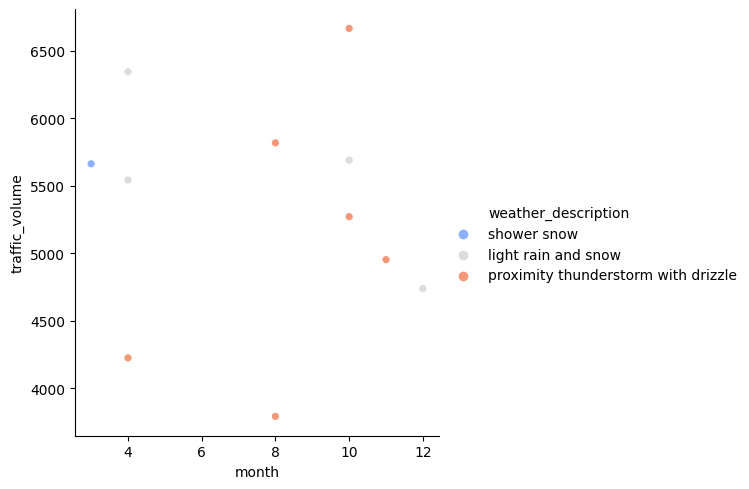

In [55]:
daytime_weather = daytime_data[daytime_data['weather_description'].isin(['shower snow', 'light rain and snow', 'proximity thunderstorm with drizzle'])]
sns.relplot(data=daytime_weather, x='month', y='traffic_volume', hue='weather_description', palette='coolwarm')
plt.show()

We can see that weather types and months of the year with heavier day time traffic do not converge, unlike night time traffic. This suggests that factors other than the weather caus traffic in warmer months to be heavier during the day time.

## Conclusion

In this project, we tried to find indicators of heavy traffic on the I-94 Interstate highway approximately midway between Minneapolis and Saint Paul. We managed to find two types of indicators:

- Time indicators: Traffic is usually heavier during warm months (March–October) during both the night and day. Day time traffic is also heavier on business days compared, with rush hours are around 7am and 4pm.
- Weather indicators: Traffic in the day time is usually heavier when three kinds of weather occur - shower snow, light rain and snow, and proximity thunderstorm with drizzle. Traffic in the night time is usually heavier when four kinds of weather occur - thunderstorm with rain, proximity shower rain, light intensity shower rain, heavy intensity drizzle. 

Further analysis also revealed that the weather types that correspond to heavier traffic in the night time occur mostly in warmer months, but the opposite is true for day time data.

Possible next steps:
- Find more time and weather indicators